## Introduction

In this test task you will have an opportunity to demonstrate your skills of a Data Scientist from various angles - processing data, analyzing and visualizing it, finding insights, applying predictive techniques and explaining your reasoning about it.

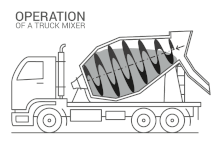

The task is based on measurement data from one concrete mixer. The concrete mixer is equipped with sensors which measure oil pressure of the hydraulic drum engine, drum rotation speed & concrete weight. The concrete consistency is measured once at the mixing plant site outside of the mixing drum by a defined measurement procedure (https://en.wikipedia.org/wiki/Flow_table_test).

Please go through the steps below, build up the necessary code and comment on your choices.

## Part 1 - Data Loading and Environment Preparation

**Tasks:**
1. Prepare a Python 3 virtual environment (with virtualenv command). requirements.txt output of pip freeze command should be included as part of your submission.
2. Load the data "feature_vector.csv" into Python runtime as Pandas dataframe.

In [194]:
#Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statistics import mean

In [195]:


#Loading the data into the data frame
df = pd.read_csv(r"C:\Users\Anilchoudary R\Desktop\feature_vector (1).csv")

# To display the top 5 rows
df.head(5)


,event_datetime,filename,DrumSpeed_rpm,ConcreteWeight_t,ConcreteConsistency_mm,HydraulicPressureDelta_bar
0,2021-02-24 12:17:18,CondiMonCam_168_2021_02_24_14_13_19.csv.gz,3.63,17974.31,420.0,69.91
1,2021-02-24 12:17:19,CondiMonCam_168_2021_02_24_14_13_19.csv.gz,3.62,17974.31,420.0,68.91
2,2021-02-24 12:17:20,CondiMonCam_168_2021_02_24_14_13_19.csv.gz,3.62,17974.31,420.0,69.71
3,2021-02-24 12:17:21,CondiMonCam_168_2021_02_24_14_13_19.csv.gz,3.62,17974.31,420.0,67.79
4,2021-02-24 12:17:22,CondiMonCam_168_2021_02_24_14_13_19.csv.gz,3.62,17974.31,420.0,66.94


## Part 2 - Data Processing and Analysis

**Tasks:**
1. Visualize drum rotation speed ("DrumSpeed_rpm"), concrete weight ("ConcreteWeight_t"), concrete consistency ("ConcreteConsistency_mm") & hydraulic pressure of drum engine ("HydraulicPresssureDelta_bar").
2. Explain the data set

In [196]:
# Checking the size of the data set
df.shape


(777, 6)

The data set has 777 rows and 6 columns. 

In [197]:
# To check for the columns names in the dataset

df.columns

Index(['event_datetime', 'filename', 'DrumSpeed_rpm', 'ConcreteWeight_t',
       'ConcreteConsistency_mm', 'HydraulicPressureDelta_bar'],
      dtype='object')

In [198]:
# Checking for the type of feature columns
df.dtypes

event_datetime                 object
filename                       object
DrumSpeed_rpm                 float64
ConcreteWeight_t              float64
ConcreteConsistency_mm        float64
HydraulicPressureDelta_bar    float64
dtype: object

### Understanding the Statistical Summary of the data

Describe function computes the summary of statistics pertaining to the Data Frame columns

In [199]:
df.describe()

,DrumSpeed_rpm,ConcreteWeight_t,ConcreteConsistency_mm,HydraulicPressureDelta_bar
count,777.000000,777.000000,777.000000,777.000000
mean,5.265045,14942.323385,518.476319,46.004929
std,2.979962,5029.304402,60.699936,16.804872
min,0.870000,2861.840000,400.000000,5.710000
25%,3.680000,10940.000000,505.000000,31.940000
50%,3.720000,17835.240000,525.000000,45.440000
75%,7.620000,18620.000000,553.330000,56.640000
max,11.580000,18820.000000,631.670000,98.880000


The above dataframe shows the different statistical measures of each featutre. We can note down the values of mean, standard deviation, minimum, maximum value of each feature. This analysis helps us to understand the range of values and spread of each feature.

### Dropping irrelevant columns

This step is essential in any EDA since there are occasions when we have a large number of columns that we never utilise; in these circumstances, dropping is the only option. In this case, the columns such as 'filename' and 'event_datetime'  doesn't make any sense to me so I just dropped for this instance


In [200]:
# Dropping irrelevant columns

df = df.drop(['event_datetime','filename'], axis=1)
df.head(5)

,DrumSpeed_rpm,ConcreteWeight_t,ConcreteConsistency_mm,HydraulicPressureDelta_bar
0,3.63,17974.31,420.0,69.91
1,3.62,17974.31,420.0,68.91
2,3.62,17974.31,420.0,69.71
3,3.62,17974.31,420.0,67.79
4,3.62,17974.31,420.0,66.94


### Dropping the missing or null values

In [201]:

#Checking for null values
print(df.isnull().sum())

DrumSpeed_rpm                 0
ConcreteWeight_t              0
ConcreteConsistency_mm        0
HydraulicPressureDelta_bar    0
dtype: int64


In the current data set, we do not have a missing value that need to be computed. so i am proceeding further with any data dropping or imoutation

### Detecting Outliers

An outlier is a point or a group of points that are not like the others. They might be extremely high or extremely low at times. Detecting and removing outliers is frequently a good idea. Because outliers are one of the most common causes of a model's inaccuracy. As a result, it's a good idea to get rid of them. The approach I'll use to find and remove outliers is known as the IQR score technique. Outliers are frequently seen in box plot displays. Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of DrumSpeed_rpm, ConcreteWeight_t, ConcreteConsistency_mm,    HydraulicPressureDelta_bar.

<AxesSubplot:xlabel='DrumSpeed_rpm'>

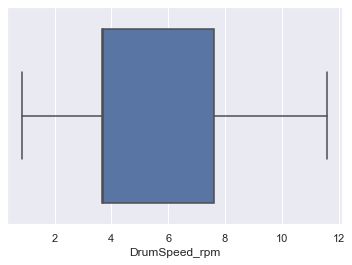

In [202]:
sns.boxplot(x=df['DrumSpeed_rpm'])

<AxesSubplot:xlabel='ConcreteWeight_t'>

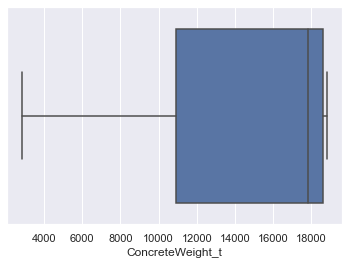

In [203]:
sns.boxplot(x=df['ConcreteWeight_t'])

<AxesSubplot:xlabel='HydraulicPressureDelta_bar'>

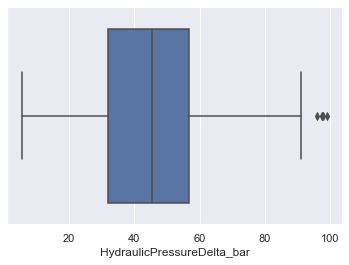

In [204]:
sns.boxplot(x=df['HydraulicPressureDelta_bar'])

<AxesSubplot:xlabel='ConcreteConsistency_mm'>

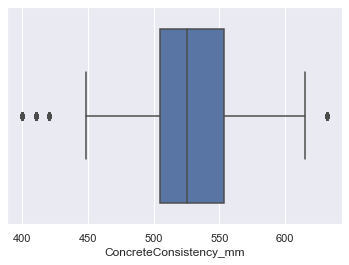

In [205]:
sns.boxplot(x=df['ConcreteConsistency_mm'])

Here in the first two plots, we do not see any points outside the outlier, but in the case of features 'HydraulicPressureDelta_bar' and 'ConcreteConsistency_mm', we do.

We can find some points that are outside the box; they are none other than outliers.

The approach of discovering and deleting outliers that I used in this project was inspired by a blog from 'towards data science'(https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)

In [206]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

DrumSpeed_rpm                    3.94
ConcreteWeight_t              7680.00
ConcreteConsistency_mm          48.33
HydraulicPressureDelta_bar      24.70
dtype: float64


In [207]:
df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(650, 4)

There were originally 777 rows in the data frame. so there were 127 outlier points excisted, which are been removed from IQR technique.

In [208]:
df.describe()

,DrumSpeed_rpm,ConcreteWeight_t,ConcreteConsistency_mm,HydraulicPressureDelta_bar
count,650.000000,650.000000,650.000000,650.000000
mean,5.225892,14261.878215,531.283615,42.491108
std,2.993344,5233.508080,43.106443,14.954669
min,0.870000,2861.840000,448.330000,5.710000
25%,3.680000,10940.000000,508.330000,29.945000
50%,3.730000,17811.940000,531.670000,42.440000
75%,7.630000,18405.720000,553.330000,52.617500
max,11.580000,18820.000000,615.000000,88.920000


C:\Users\Anilchoudary R\.conda\envs\liebherr_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anilchoudary R\.conda\envs\liebherr_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anilchoudary R\.conda\envs\liebherr_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fi

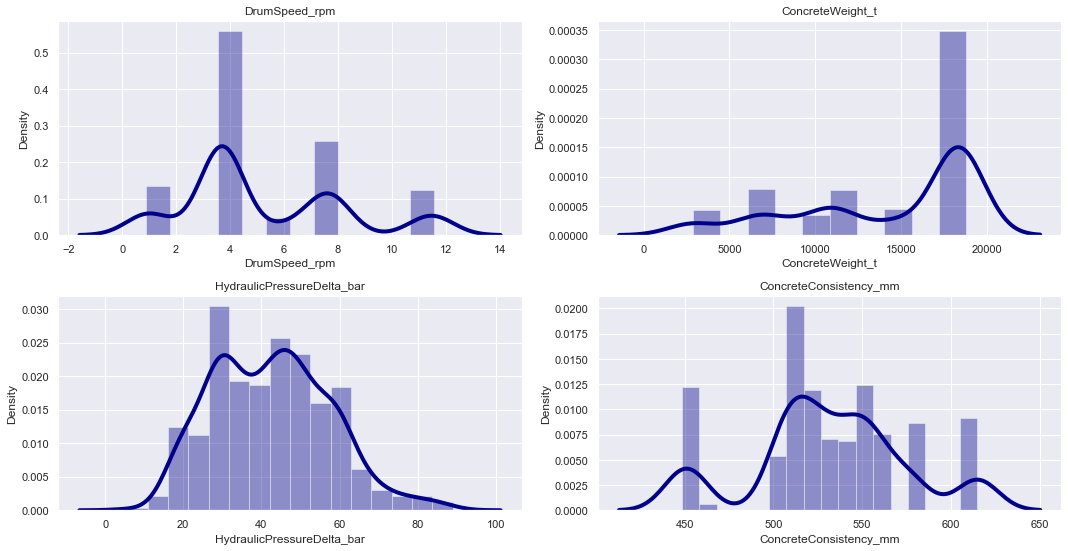

In [209]:
# Plotting histograms of the following numerical attributes --      # "engine-size", "peak-rpm","horsepower","price"
hist_col_names = ["DrumSpeed_rpm", "ConcreteWeight_t","HydraulicPressureDelta_bar","ConcreteConsistency_mm"]
for i in hist_col_names:
    df[i] = df[i].astype(float) # It changes data type
plt.figure(figsize=(15,15))
cnt=1
for i in hist_col_names:
    plt.subplot(4,2,cnt)
    sns.distplot(df[i], hist=True, color = 'darkblue', kde_kws={'linewidth': 4})
    plt.title(i)
    cnt=cnt+1
plt.tight_layout()
plt.show()

The above histograms shows the distribution of data points of each feature. It is evident from plots that the data points are spread over a range of values. 

,DrumSpeed_rpm,ConcreteWeight_t,ConcreteConsistency_mm,HydraulicPressureDelta_bar
DrumSpeed_rpm,1.000000,-0.132238,-0.101752,0.596360
ConcreteWeight_t,-0.132238,1.000000,0.350217,-0.034921
ConcreteConsistency_mm,-0.101752,0.350217,1.000000,-0.606262
HydraulicPressureDelta_bar,0.596360,-0.034921,-0.606262,1.000000


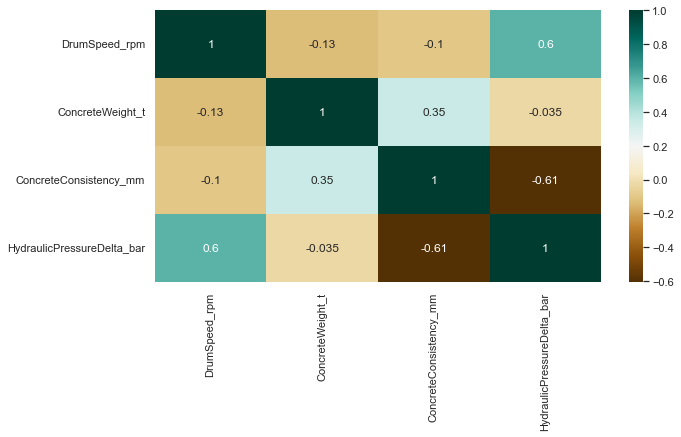

In [210]:
# Finding the relations between the variables.
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

When we need to determine the dependent variables, we need to use a form of visualisation called a heat map. Heat maps are one of the most effective tools for determining the relationship between features. We can see from the heat map below that the Concrete consistancy depends negatively on feature 'HydraulicPressureDelta_bar' and positively on 'concreteweight_t' features. These dependencies are vary imporatant to understand and model the problem for a regression task. 

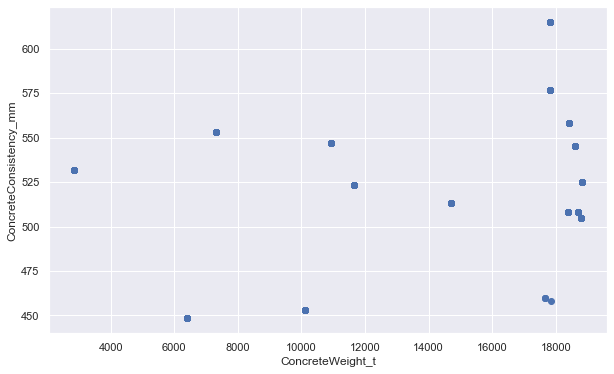

In [211]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['ConcreteWeight_t'], df ['ConcreteConsistency_mm'])
ax.set_xlabel('ConcreteWeight_t')
ax.set_ylabel('ConcreteConsistency_mm')
plt.show()

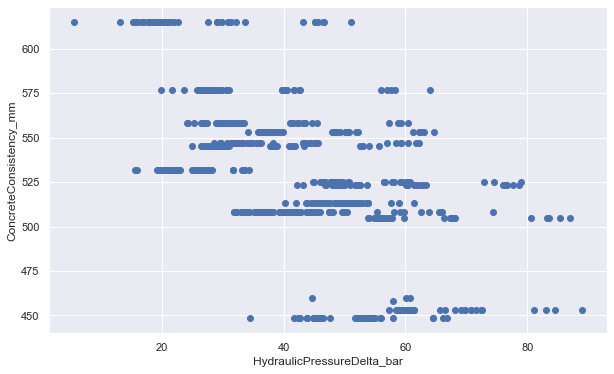

In [212]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HydraulicPressureDelta_bar'], df ['ConcreteConsistency_mm'])
ax.set_xlabel('HydraulicPressureDelta_bar')
ax.set_ylabel('ConcreteConsistency_mm')
plt.show()

From the above plot, it is evident that, as the value of hydraulic pressure increases, the concrete consistancy decreases. This was previously observed in heat maps and is also seen in 2-D scatter plots.

**Answers / comments / reasoning:**



## Part 3 - Building prediction models

**Tasks:**
1. Build a prediction model for ConcreteConsistency_mm with Random Forest, preferably making use of following python libraries: scikit-learn.
2. Select a test metric and report the value of the test metric on the provided data. 

Splittng the data is an vital step before we built a model becasue we need data for both train the model and test the model that we built. So in the current case, I am splitting a data as train : test as 80 : 20. 

In [213]:

y = df.ConcreteConsistency_mm
y

28     523.33
29     523.33
30     523.33
31     523.33
32     523.33
        ...  
735    513.33
736    513.33
737    513.33
738    513.33
739    513.33
Name: ConcreteConsistency_mm, Length: 650, dtype: float64

In [214]:
x = df.drop('ConcreteConsistency_mm',axis=1)
x

,DrumSpeed_rpm,ConcreteWeight_t,HydraulicPressureDelta_bar
28,11.41,11646.43,78.64
29,0.94,11646.43,42.29
30,3.69,11646.43,53.72
31,3.68,11646.43,49.95
32,3.66,11646.43,52.61
...,...,...,...
735,6.05,14720.00,49.19
736,6.05,14720.00,48.81
737,6.01,14720.00,51.24
738,3.66,14720.00,40.17


In [215]:
x.head()

,DrumSpeed_rpm,ConcreteWeight_t,HydraulicPressureDelta_bar
28,11.41,11646.43,78.64
29,0.94,11646.43,42.29
30,3.69,11646.43,53.72
31,3.68,11646.43,49.95
32,3.66,11646.43,52.61


In [216]:
y.head()

28    523.33
29    523.33
30    523.33
31    523.33
32    523.33
Name: ConcreteConsistency_mm, dtype: float64

In [217]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [218]:
print('Shape of Original dataset:', df.shape)
print('Shape of input - training set:', x_train.shape)
print('Shape of output - training set:', y_train.shape)
print('Shape of input - testing set:', x_test.shape)
print('Shape of output - testing set:', y_test.shape)


Shape of Original dataset: (650, 4)
Shape of input - training set: (520, 3)
Shape of output - training set: (520,)
Shape of input - testing set: (130, 3)
Shape of output - testing set: (130,)


In [219]:
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)

# x_test = scaler.fit_transform(x_test)


# #y_train = y_train.values.reshape(-1, 1)
# y_train = scaler.fit_transform(y_train)



# #y_test = y_test.values.reshape(-1, 1)
# y_test = scaler.fit_transform(y_test)

In [220]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor()

# Train the model on training data
rf.fit(x_train, y_train);

In [221]:
# Use the forest's predict method on the test data
predictions = rf.predict(x_test)


# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))



Mean Absolute Error: 2.45


In [222]:

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
print('MAPE:', mean(mape))


# Calculate and display accuracy
accuracy = 100 - np.mean(mape)

print('Accuracy:', round(accuracy, 2), '%.')


MAPE: 0.46173909308986033
Accuracy: 99.54 %.


In the current project, before model building, even standardisation of data is tried, but the accuracy with standardzation  was 97.6%, but without standardization, the accuracy was 99.54%. So I skipped the step of standardisation of data.

**Answers / comments / reasoning:**



## Part 4 - Reflection / comments

**Tasks:**
(Optional) Please share with us any free form reflection, comments or feedback you have in the context of this test task.

Conclusion 

1. The dataset does not have any missing values or null values, so no data imputation is required.

2. The data has features called time and file name, which do not contribute to moodel building or accuracy of prediction, so these features are removed and do not need to be included in the future data collection process.

3. From outlier analysis, there were outliers in the features which have been removed by suitable oulier removal technique (IQR).

4. The data standardisation decreases the accuracy of the model, so this step is not considered.
5. Mean absolute error, Mean absolute percentage error and accuracy are choosen as metric and the Random forest model is been evaluated.
6. Since the model is given very good accuracy at its deafult parametrs, hyper parameter tuning is not included in the analysis
7. Random Forest model gives the accuracy of  <b>99.54 percent of accuracy with MAE and MAPE being 2.45 and 0.4617.
8. The results are very good with such a high accuracy and very low error values


## Submission

Please submit this notebook with your developments in .ipynb and .html formats as well as your requirements.txt file.

In [2]:
! jupyter nbconvert --to html CodingTask_20220117.ipynb

[NbConvertApp] Converting notebook CodingTask_20220117.ipynb to html
[NbConvertApp] Writing 876373 bytes to CodingTask_20220117.html
